In [44]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]

In [45]:
df = pd.read_csv("data/train.csv", index_col="date")
df.index = pd.to_datetime(df.index, utc=True)

In [ ]:
# Fonction pour appliquer toutes les transformations faites dans ce notebook
def geo_tweak(df):
    return (
        df.rename(
            columns={
                "Auvergne-Rhône-Alpes": "ARA",
                "Bourgogne-Franche-Comté": "BFC",
                "Centre-Val de Loire": "CVL",
                "Grand Est": "GE",
                "Hauts-de-France": "HDF",
                "Nouvelle-Aquitaine": "NA",
                "Pays de la Loire": "PL",
                "Provence-Alpes-Côte d'Azur": "PACA",
                "Île-de-France": "IDF",
                "Montpellier Méditerranée Métropole": "Montpellier",
                "Métropole Européenne de Lille": "Lille",
                "Métropole Grenoble-Alpes-Métropole": "Grenoble",
                "Métropole Nice Côte d'Azur": "Nice",
                "Métropole Rennes Métropole": "Rennes",
                "Métropole Rouen Normandie": "Rouen",
                "Métropole d'Aix-Marseille-Provence": "Marseille",
                "Métropole de Lyon": "Lyon",
                "Métropole du Grand Nancy": "Nancy",
                "Métropole du Grand Paris": "Paris",
                "Nantes Métropole": "Nantes",
                "Toulouse Métropole": "Toulouse",
            },
        )
    )

In [46]:
df.rename(
    columns={
        "Auvergne-Rhône-Alpes": "ARA",
        "Bourgogne-Franche-Comté": "BFC",
        "Centre-Val de Loire": "CVL",
        "Grand Est": "GE",
        "Hauts-de-France": "HDF",
        "Nouvelle-Aquitaine": "NA",
        "Pays de la Loire": "PL",
        "Provence-Alpes-Côte d'Azur": "PACA",
        "Île-de-France": "IDF",
        "Montpellier Méditerranée Métropole": "Montpellier",
        "Métropole Européenne de Lille": "Lille",
        "Métropole Grenoble-Alpes-Métropole": "Grenoble",
        "Métropole Nice Côte d'Azur": "Nice",
        "Métropole Rennes Métropole": "Rennes",
        "Métropole Rouen Normandie": "Rouen",
        "Métropole d'Aix-Marseille-Provence": "Marseille",
        "Métropole de Lyon": "Lyon",
        "Métropole du Grand Nancy": "Nancy",
        "Métropole du Grand Paris": "Paris",
        "Nantes Métropole": "Nantes",
        "Toulouse Métropole": "Toulouse",
    },
    inplace=True,
)
regions = list(df.columns)[1:13]
villes = list(df.columns)[13:]
villes_no_paris = villes.copy()
villes_no_paris.remove("Paris")
regions_france = ["France"] + regions
cols = list(df.columns)

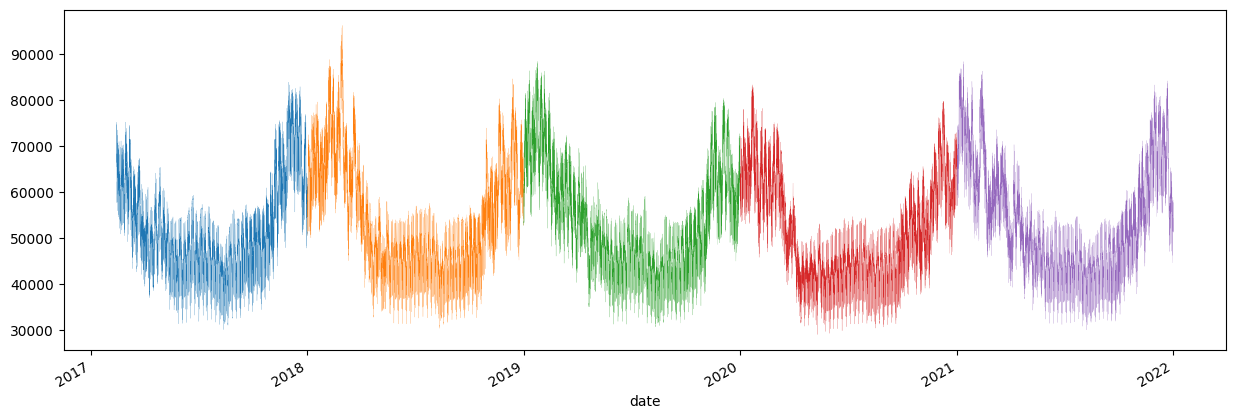

In [47]:
year_min = df["France"].index.min().year
year_max = df["France"].index.max().year
for year in range(year_min, year_max+1):
    df["France"].loc[f"{year}-01-01":f"{year+1}-01-01"].plot.line(alpha=1, linewidth=0.1)

<Axes: >

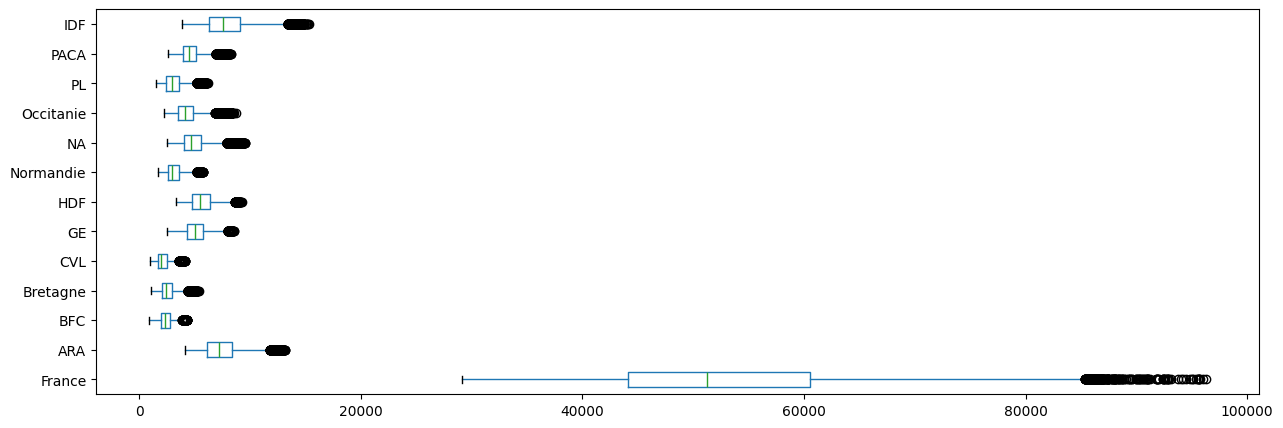

In [48]:
df[regions_france].boxplot(
    vert=False,
    fontsize=10,
    grid=False,
)

<Axes: >

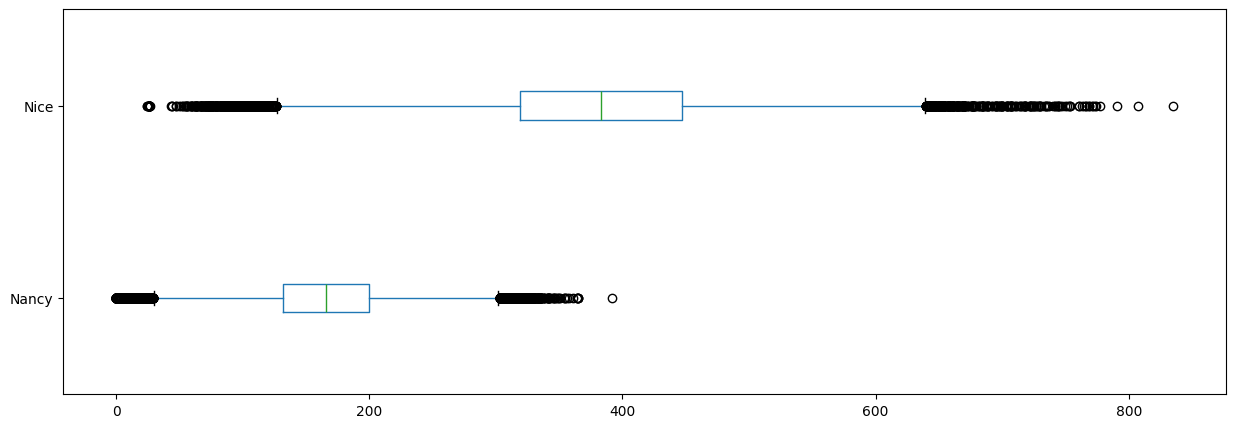

In [49]:
df[["Nancy", "Nice"]].boxplot(
    vert=False,
    fontsize=10,
    grid=False
)

<Axes: xlabel='date'>

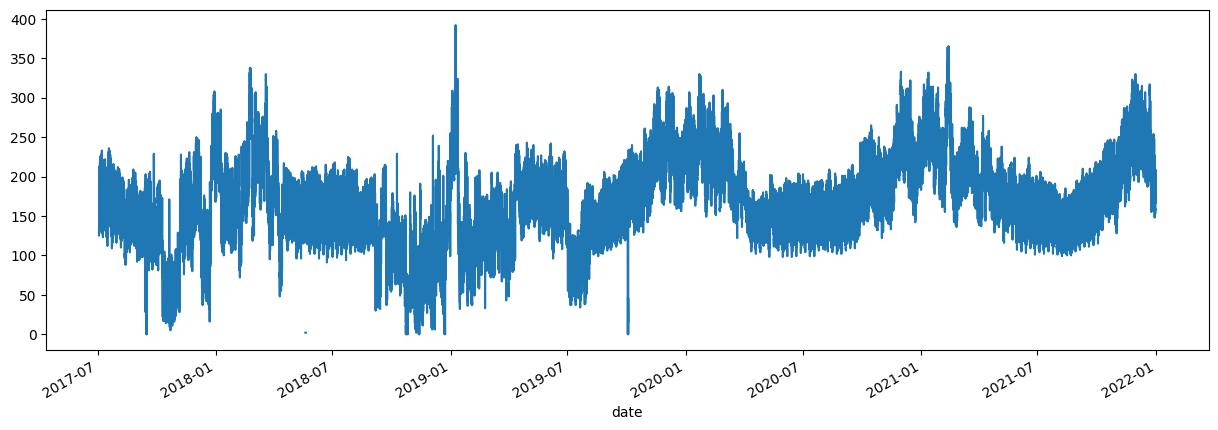

In [50]:
df["Nancy"].plot.line()

In [51]:
(df[villes] <20).sum()

Montpellier      0
Lille            0
Grenoble         2
Nice             0
Rennes          48
Rouen            0
Marseille       23
Lyon             0
Nancy          326
Paris           48
Nantes          43
Toulouse        48
dtype: int64

<Axes: >

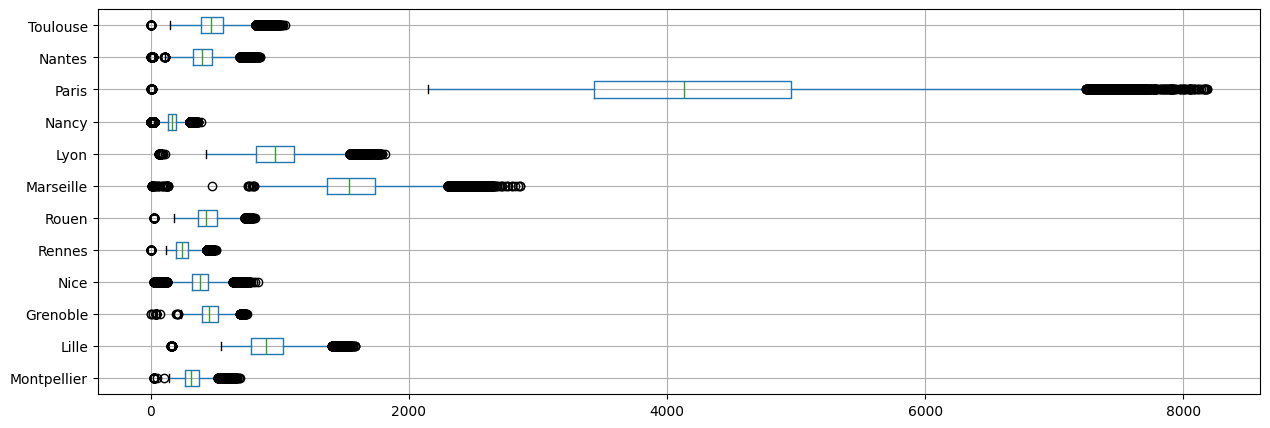

In [52]:
df[villes].boxplot(
    vert=False,
)

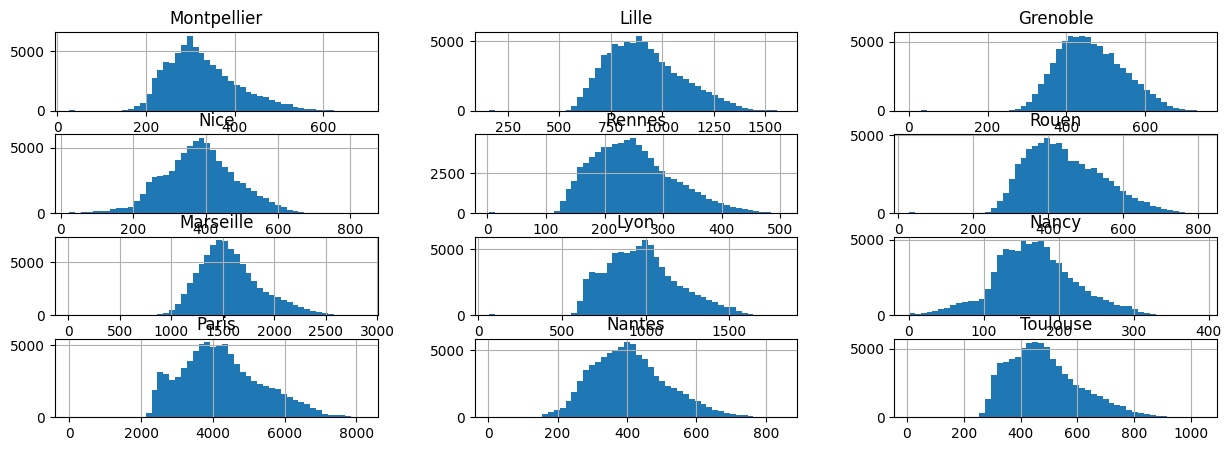

In [53]:
df[villes].hist(
    bins=50,
);

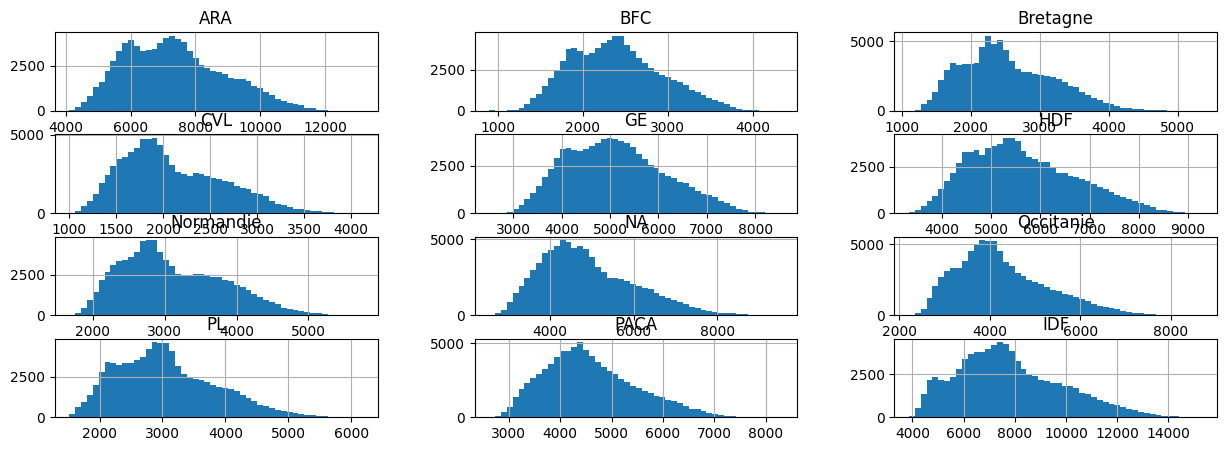

In [54]:
df[regions].hist(
    bins=50,
    );

<Axes: xlabel='date'>

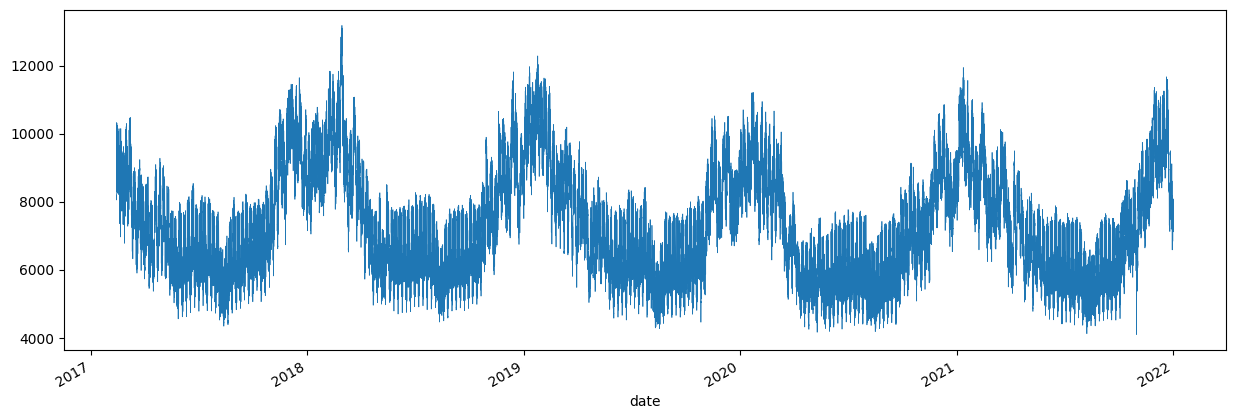

In [55]:
df["ARA"].plot.line(linewidth=0.5)

In [56]:
df[cols].corr().style.background_gradient(cmap='coolwarm')

,France,ARA,BFC,Bretagne,CVL,GE,HDF,Normandie,NA,Occitanie,PL,PACA,IDF,Montpellier,Lille,Grenoble,Nice,Rennes,Rouen,Marseille,Lyon,Nancy,Paris,Nantes,Toulouse
France,1.000000,0.982927,0.971098,0.965693,0.971790,0.967231,0.971667,0.970690,0.975844,0.953249,0.975475,0.914687,0.976005,0.882170,0.942487,0.841531,0.753309,0.936002,0.935615,0.889358,0.955082,0.556249,0.956042,0.944687,0.937975
ARA,0.982927,1.000000,0.973596,0.926470,0.946605,0.961360,0.949016,0.938366,0.954076,0.937958,0.950099,0.902216,0.946102,0.861348,0.914875,0.862951,0.734998,0.912509,0.912848,0.879629,0.955457,0.521726,0.929967,0.922685,0.924482
BFC,0.971098,0.973596,1.000000,0.924694,0.936407,0.973627,0.954038,0.935450,0.932314,0.895132,0.946016,0.848276,0.946093,0.820016,0.934589,0.828493,0.686900,0.931104,0.916540,0.853510,0.942812,0.549962,0.931223,0.923579,0.895491
Bretagne,0.965693,0.926470,0.924694,1.000000,0.953406,0.923529,0.943868,0.970353,0.943119,0.905119,0.978825,0.858517,0.932288,0.838625,0.915773,0.762701,0.730164,0.931583,0.915509,0.831805,0.893422,0.561127,0.905385,0.932321,0.893227
CVL,0.971790,0.946605,0.936407,0.953406,1.000000,0.928637,0.948941,0.961851,0.952826,0.921320,0.959605,0.872221,0.937135,0.849208,0.906557,0.808814,0.724939,0.898341,0.916200,0.837421,0.900459,0.525738,0.912258,0.912876,0.897720
GE,0.967231,0.961360,0.973627,0.923529,0.928637,1.000000,0.965569,0.935313,0.919247,0.875652,0.944158,0.830567,0.949045,0.806383,0.946439,0.821568,0.675901,0.938146,0.921885,0.846490,0.932945,0.548695,0.932116,0.926661,0.883088
HDF,0.971667,0.949016,0.954038,0.943868,0.948941,0.965569,1.000000,0.963917,0.922797,0.881259,0.949317,0.834767,0.957192,0.794076,0.953982,0.834091,0.687332,0.931607,0.934759,0.830372,0.905943,0.508875,0.936529,0.930577,0.880670
Normandie,0.970690,0.938366,0.935450,0.970353,0.961851,0.935313,0.963917,1.000000,0.933495,0.894975,0.963369,0.847251,0.950610,0.820231,0.923651,0.791416,0.708466,0.914267,0.939205,0.824968,0.889227,0.521740,0.917157,0.924916,0.889518
NA,0.975844,0.954076,0.932314,0.943119,0.952826,0.919247,0.922797,0.933495,1.000000,0.966034,0.957361,0.917144,0.932433,0.883092,0.893762,0.806634,0.739817,0.896764,0.898940,0.873310,0.930664,0.552216,0.909711,0.912014,0.935602
Occitanie,0.953249,0.937958,0.895132,0.905119,0.921320,0.875652,0.881259,0.894975,0.966034,1.000000,0.911481,0.960937,0.904340,0.930571,0.851073,0.809261,0.797837,0.846406,0.864762,0.890195,0.926493,0.517614,0.887337,0.869116,0.953307


<Axes: xlabel='Paris', ylabel='IDF'>

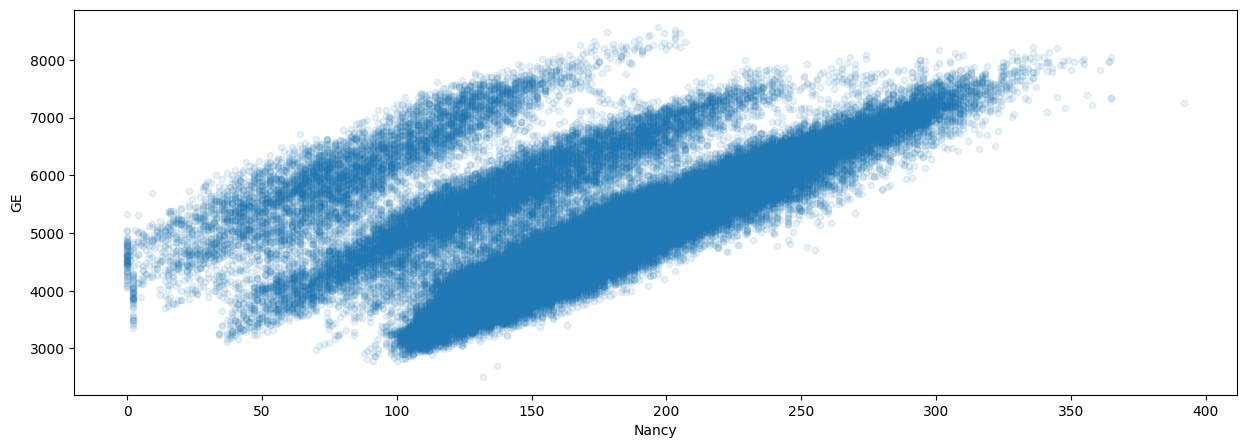

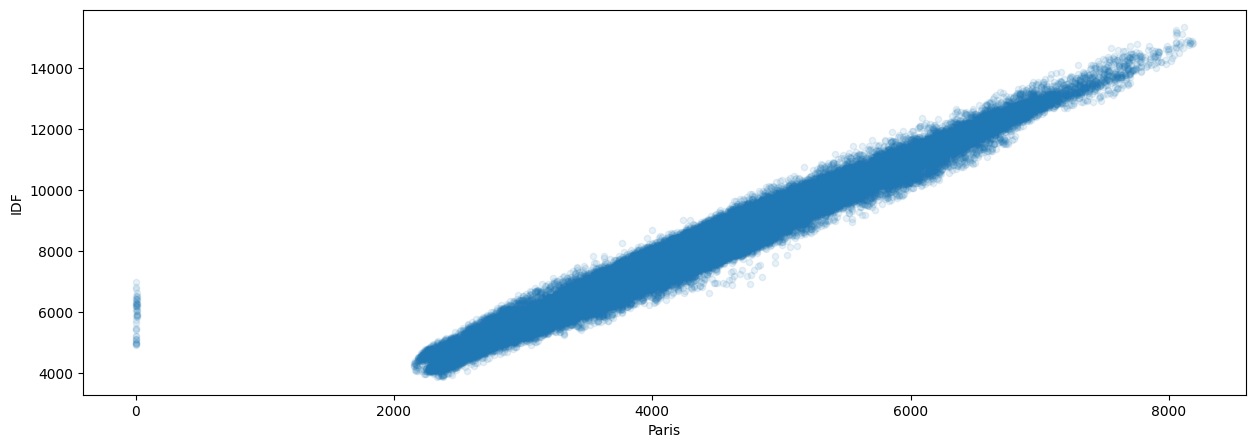

In [57]:
df[["Nancy", "GE"]].plot.scatter(x="Nancy", y="GE", alpha=0.1)
df[["Paris", "IDF"]].plot.scatter(x="Paris", y="IDF", alpha=0.1)

<Axes: xlabel='date'>

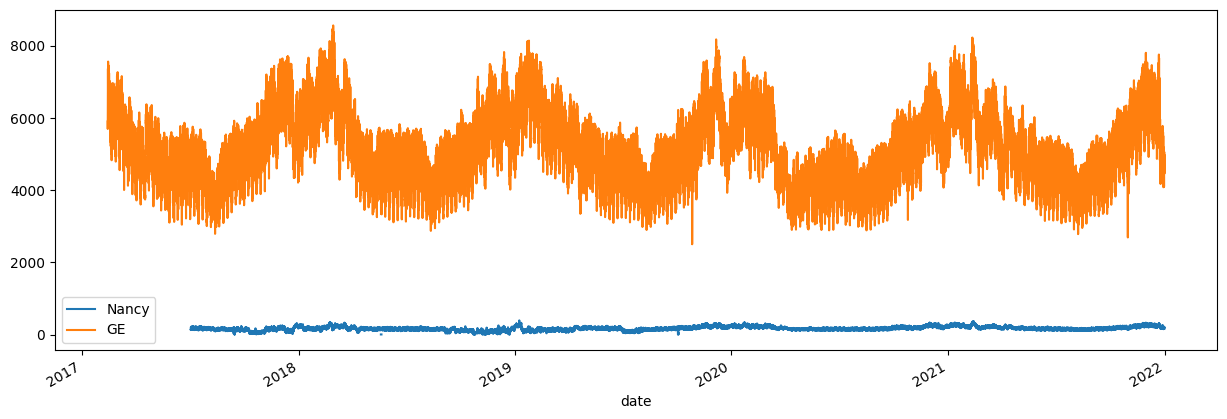

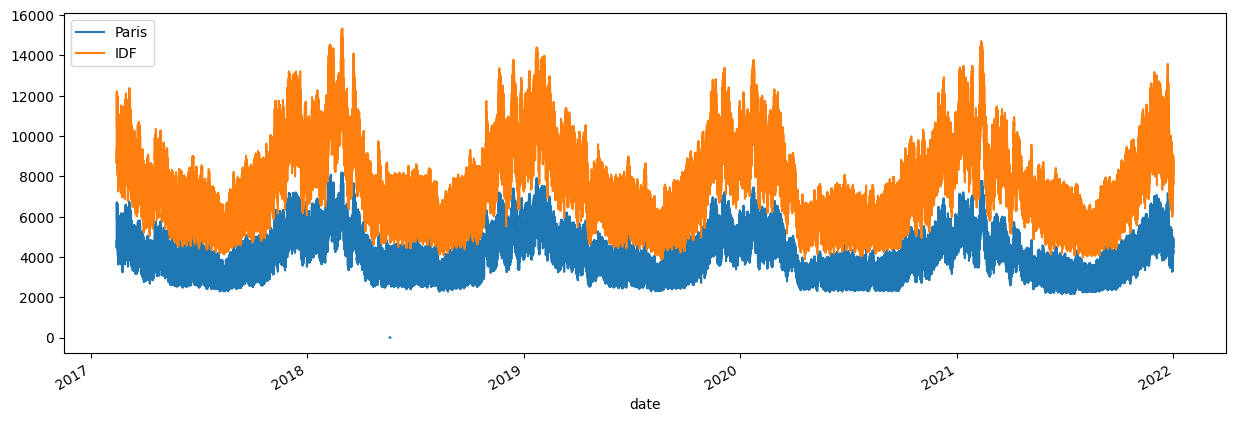

In [58]:
df[["Nancy", "GE"]].plot.line()
df[["Paris", "IDF"]].plot.line()